# Nanodegree Engenheiro de Machine Learning
## Projeto final
Gleber Antunes Baptistella  
Fevereiro de 2018

## I. Definição

Código-fonte utilizado para a criação do relatório final do Nanodegree de Machine Learning.
Detalhes de implementação estão comentados no próprio código. Descrição e definição do problema, metodologia, resultado e conclusões encontram-se no relatório final.

## II. Análise

### Exploração de dados

No problema apresentado temos informações pessoais, bem como informações dos eixo x, y e z de cada sensor disposto pelo corpo dos indivíduos.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from __future__ import division
%matplotlib inline
sns.set()
# Lendo os dados de treinamento
wearable_data = pd.read_csv("dataset-har-PUC-Rio-ugulino.csv", delimiter=';')
print("Dados de treinamento lidos com sucesso!")
print("Total de linhas: ",len(wearable_data.index))

Dados de treinamento lidos com sucesso!
Total de linhas:  165633


In [2]:
wearable_data.describe(include='all')

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
count,165633,165633,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633
unique,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,debora,Woman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sitting
freq,51577,101374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50631
mean,NaN,NaN,38.265146,1.639712,70.819408,26.188522,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171,-159.650891,NaN
std,NaN,NaN,13.184091,0.052820,11.296527,2.995777,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610,13.221036,NaN
min,NaN,NaN,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000,-537.000000,NaN
25%,NaN,NaN,28.000000,1.580000,55.000000,22.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000,-167.000000,NaN
50%,NaN,NaN,31.000000,1.620000,75.000000,28.400000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000,-160.000000,NaN
75%,NaN,NaN,46.000000,1.710000,83.000000,28.600000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000,-153.000000,NaN


Não há missing values. Todos as colunas possuem o mesmo valor de _count_ da quantidade total de linhas (165.633).

Abaixo podemos ver os tipos de dados de cada variável.

In [3]:
wearable_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165633 entries, 0 to 165632
Data columns (total 19 columns):
user                  165633 non-null object
gender                165633 non-null object
age                   165633 non-null int64
how_tall_in_meters    165633 non-null float64
weight                165633 non-null int64
body_mass_index       165633 non-null float64
x1                    165633 non-null int64
y1                    165633 non-null int64
z1                    165633 non-null int64
x2                    165633 non-null int64
y2                    165633 non-null int64
z2                    165633 non-null int64
x3                    165633 non-null int64
y3                    165633 non-null int64
z3                    165633 non-null int64
x4                    165633 non-null int64
y4                    165633 non-null int64
z4                    165633 non-null int64
class                 165633 non-null object
dtypes: float64(2), int64(14), object(3)
memor

### Convertendo categóricas de string para numérica

O target trata-se da coluna _class_. Das _features_ removi a coluna _user_, já que acredito não fazer muito sentido para o modelo. Em seguida iremos substituir as variáveis categóricas que estão no formato _String_ para o formato numérico.

In [4]:
y_all = wearable_data['class'].to_frame()
X_all = wearable_data.drop(['user', 'class'], axis=1)

gender_nums = {"gender":{"Woman": 0, "Man": 1}}
X_all.replace(gender_nums, inplace=True)

class_nums = {"class":{'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking':4}}
y_all.replace(class_nums, inplace=True)

### Verificando se há desbalanceamento do _target_
Em muitos casos encontramos situações onde uma determinada classe do _target_ possuem poucas amostras. Isso pode influenciar no resultado do modelo.

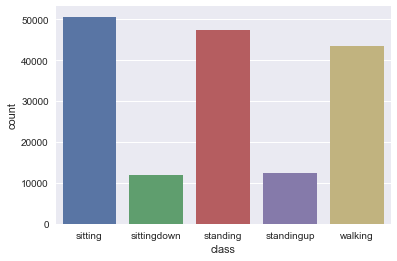

In [5]:
sns.countplot(x="class", data=wearable_data)

Dataset sendo dividido em 65% para treinamento e 35% para teste

In [6]:
# Quebrando o dataset em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.35, random_state=1973)

In [7]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def run_all_models(_X_train, _y_train, _X_test, _y_test):
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('Randomforest', RandomForestClassifier()))
    models.append(('NB', GaussianNB()))
    for name, model in models:
        score_array =[]

        model.fit(_X_train, _y_train.values.ravel())
        y_pred = model.predict(_X_test)
        score = precision_recall_fscore_support(_y_test, y_pred, average='macro')
        score_array.append([score[0], score[1], score[2]])
        
        print('----------->', name)
        avg_score = np.mean(score_array,axis=0)
        print("Precision:", avg_score[0])
        print("Recall:", avg_score[1])
        print("F1:", avg_score[2])
        
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):
    '''
    Função para calcular o ROC AUC para targets multilabel
    '''
    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average)

### Estabelecendo a baseline

A _baseline_ será a execução dos algoritmos GaussianNB, RandomForestClassifier e KNeighborsClassifier sem refinamento dos mesmos, isto é, executarão com seus valores _default_.

Será criada afunção `run_all_models` que irá criar o modelo e a predição para os algoritmos escolhidos.


In [8]:
run_all_models(X_train, y_train, X_test, y_test)

-----------> KNN
Precision: 0.990119049512
Recall: 0.990548085319
F1: 0.990317282204
-----------> Randomforest
Precision: 0.990934695407
Recall: 0.989246844746
F1: 0.990078722118
-----------> NB
Precision: 0.673807543301
Recall: 0.646730218949
F1: 0.645269049901


### Resultado da baseline

Excluindo o GaussianNB, que teve um desempenho ruim, o KNN e o Random Forest partem de um _baseline_ bastante bom, com o F1 acima de 0.98 (num _range_ de 0 a 1).

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9901 | 0.9905 | 0.9903 |
| RandomForest |    0.9911 | 0.9897 | 0.9904 |
| GaussianNB   |    0.6738 | 0.6467 | 0.6452 |

### Balanceando o dataset
Como podemos ver no gráfico acima, as classes "sittingdown" e "standingup" possuem uma quantidade de amostras bem menor que "sitting", "standing" e "walking".

Nesta situação podemos fazer o balanceamento reduzindo a quantidade de registros das classes que possuem maior representação, ou criar dados sintéticos para as classes sub-representadas.

Neste projeto iremos criar dados sintéticos com a biblioteca [imblearn.over_sampling.SMOTE](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html).

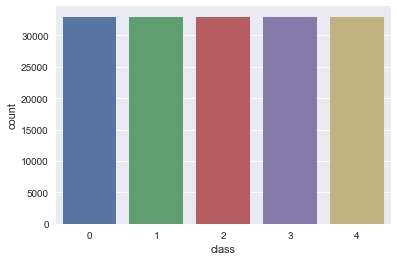

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=73)
X_res, y_res = sm.fit_sample(X_train, y_train.values.ravel())
X_train = pd.DataFrame(X_res, columns=X_train.columns)
y_train = pd.DataFrame(y_res, columns=y_train.columns)
sns.countplot(x="class", data=y_train)

Agora todas as classes estão balanceadas.

In [10]:
run_all_models(X_train, y_train, X_test, y_test)

-----------> KNN
Precision: 0.989105464204
Recall: 0.992620615023
F1: 0.990838758499
-----------> Randomforest
Precision: 0.991570037479
Recall: 0.991715982128
F1: 0.991639959739
-----------> NB
Precision: 0.648609867489
Recall: 0.654568851406
F1: 0.634050062762


## Tratamento dos dados

A partir desta sessão iremos trabalhar com os dados, normalizando-os e reduzindo a dimensionalidade

### Normalizando a escala dos dados 

In [11]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.head(3)

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
0,0.0,0.00000,0.0,0.0,0.000000,0.334969,0.360697,0.565089,0.220269,0.188424,0.290934,0.530060,0.601173,0.499511,0.817638,0.705882,0.759109
1,0.0,0.00000,0.0,0.0,0.000000,0.369325,0.442786,0.476331,0.508790,0.743842,0.707713,0.522044,0.603128,0.487781,0.763827,0.718954,0.795547
2,1.0,0.06383,1.0,1.0,0.969697,0.382822,0.425373,0.535503,0.488108,0.600985,0.803789,0.563126,0.548387,0.508309,0.913303,0.640523,0.740891


Neste momento todos os dados estão normalizados numa escala de 0 a 1.

Com isso, iremos reexecutar todos os modelos.

In [12]:
run_all_models(X_train_scaled, y_train, X_test_scaled, y_test)

-----------> KNN
Precision: 0.988892392059
Recall: 0.992688012921
F1: 0.990764147519
-----------> Randomforest
Precision: 0.99023286457
Recall: 0.990749276094
F1: 0.990489827912
-----------> NB
Precision: 0.64857742028
Recall: 0.654520866761
F1: 0.634017619276


### Resultados após o Scaling

Em todas as métricas houve uma pequena perda entre a baseline e o novo resultado.

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9845 | 0.9829 | 0.9829 |
| RandomForest |    0.9868 | 0.9854 | 0.9853 |
| GaussianNB   |    0.6003 | 0.6012 | 0.5572 |

### Importância das _Features_

No _dataset_ nem todas as _features_ tem a mesma importância para a definição do modelo. Aqui vamos verificar as variáveis mais relevantes e excluir as menos relevantes.

Será utilizado o algoritmo de árvore de classificação [sklearn.ensemble.ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) para definir as variáveis com maior importância dentro do dataset

1. feature 10 (0.121771)
2. feature 14 (0.099334)
3. feature 7 (0.095892)
4. feature 9 (0.091284)
5. feature 6 (0.080847)
6. feature 16 (0.077145)
7. feature 12 (0.071763)
8. feature 13 (0.071387)
9. feature 5 (0.063293)
10. feature 8 (0.057865)
11. feature 15 (0.052048)
12. feature 11 (0.043667)
13. feature 4 (0.016393)
14. feature 2 (0.015555)
15. feature 0 (0.015236)
16. feature 3 (0.014364)
17. feature 1 (0.012155)


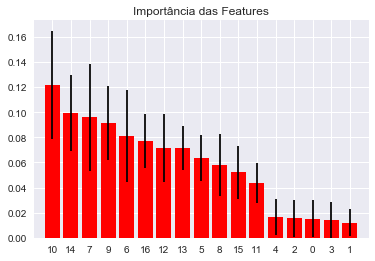

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

feature_importance = ExtraTreesClassifier(n_estimators=150,
                              random_state=0)
feature_importance = feature_importance.fit(X_train_scaled, y_train.values.ravel())
importances = feature_importance.feature_importances_
std = np.std([tree.feature_importances_ for tree in feature_importance.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Importância das Features")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [14]:
X_all.columns[[10,14,7,9,6,16,12,13,5,8,15,11,4,2,0,3,1]]

Index(['z2', 'x4', 'z1', 'y2', 'y1', 'z4', 'y3', 'z3', 'x1', 'x2', 'y4', 'x3',
       'body_mass_index', 'how_tall_in_meters', 'gender', 'weight', 'age'],
      dtype='object')

Pelo gráfico podemos ver que as variávies cujo índice estão no _range_ de 0 a 4 pouco influenciam no modelo. Tratam-se de variáveis de características pessoais dos dados coletados: altura em metros (how_tall_in_meters), índice de massa corpórea (body_mass_index), peso (weight), gênero (gender) e idade (age). Para continuarmos os testes, irei excluir estas variáveis e manter apenas as variáveis referentes aos eixos e reexecutar os algoritmos.|

In [15]:
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_train_scaled.columns)
X_test_scaled.head()

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
0,0.0,0.000000,0.000000,0.000000,0.000000,0.370552,0.463930,0.496055,0.524302,0.746305,0.669824,0.541082,0.595308,0.515152,0.765321,0.722222,0.769231
1,0.0,0.000000,0.000000,0.000000,0.000000,0.375460,0.465174,0.496055,0.525336,0.745074,0.673884,0.533066,0.594330,0.517107,0.763827,0.720588,0.763158
2,1.0,0.063830,1.000000,1.000000,0.969697,0.349693,0.471393,0.472387,0.016546,0.027094,0.062246,0.491984,0.605083,0.491691,0.727952,0.815359,0.740891
3,0.0,0.382979,0.307692,0.714286,1.000000,0.371779,0.468905,0.506903,0.516029,0.745074,0.669824,0.521042,0.600196,0.506354,0.787743,0.712418,0.763158
4,0.0,0.382979,0.307692,0.714286,1.000000,0.365644,0.415423,0.547337,0.501551,0.656404,0.783491,0.507014,0.589443,0.522972,0.811659,0.686275,0.748988


In [16]:
X_train_reduced = X_train_scaled[X_train_scaled.columns[[10,14,7,9,6,16,12,13,5,8,15,11]]]
X_test_reduced = X_test_scaled[X_test_scaled.columns[[10,14,7,9,6,16,12,13,5,8,15,11]]]
run_all_models(X_train_reduced, y_train, X_test_reduced, y_test)

-----------> KNN
Precision: 0.985322218352
Recall: 0.99047707912
F1: 0.987849435357
-----------> Randomforest
Precision: 0.987836127114
Recall: 0.98833395153
F1: 0.988083397539
-----------> NB
Precision: 0.646545704362
Recall: 0.653202923593
F1: 0.631661097254


### Resultado após a remoção das variáveis

Em todas as métricas houve uma pequena perda. Contudo não são perdas significativas ao meu ver.

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9853 | 0.9904 | 0.9878 |
| RandomForest |    0.9882 | 0.9887 | 0,9884 |
| GaussianNB   |    0.6465 | 0.6532 | 0.6316 |

### Reduzindo a dimensionalidade

Já reduzimos os números de _features_ originais de 18 para 12. Apesar do desempenho ter sido um pouco pior, lembramos aqui que não foi feito nenhum refinamento nos algoritmos.

Agora tentaremos reduzir ainda mais a dimensionalidade aplicando o PCA, buscando entender com quantas variáveis a variância dos dados é explicada.

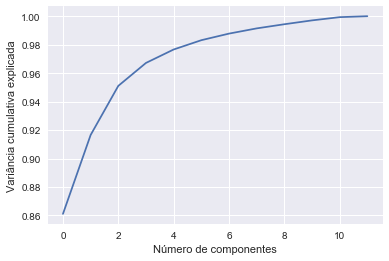

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_reduced)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variância cumulativa explicada')
plt.show()

Como podemos ver pelo gráfico, mais de 99% da variância é explicada por 10 componentes. Portanto criaremos um dataset com 10 componentes principais e rodaremos novamente os modelos.

In [18]:
pca = PCA(n_components = 10)
pca.fit(X_train_reduced)
principalComponentsTrain = pca.transform(X_train_reduced)
principalComponentsTest = pca.transform(X_test_reduced)
X_train_pca = pd.DataFrame(data=principalComponentsTrain, 
                    columns=['p1','p2','p3','p4','p5','p6','p7','p8','p9', 'p10'])
X_test_pca = pd.DataFrame(data=principalComponentsTest, 
                    columns=['p1','p2','p3','p4','p5','p6','p7','p8','p9', 'p10'])

In [19]:
run_all_models(X_train_pca, y_train, X_test_pca, y_test)

-----------> KNN
Precision: 0.983521413453
Recall: 0.989175765285
F1: 0.986288813299
-----------> Randomforest
Precision: 0.979665444648
Recall: 0.982691893004
F1: 0.981165987244
-----------> NB
Precision: 0.748504785432
Recall: 0.724973513863
F1: 0.719462565653


### Resultados após o PCA

Mais uma vez houve uma perda da performance dos indicadores, apenas o GaussianNB teve uma melhora, contudo os algoritmos rodaram substancialmente mais rápidos. Reforço que ainda não foi feita a hiperparametrização dos algoritmos.

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9835 | 0.9891 | 0.9862 |
| RandomForest |    0.9805 | 0.9832 | 0.9819 |
| GaussianNB   |    0.7485 | 0.7249 | 0.7194 |

## Refinamento dos modelos

Para o refinamento dos modelos vamos partir do dataset que teve melhores resultados, ou seja, `X_train_scaled`, `y_train`, `X_test_scaled`, e `y_test`.

A ideia nesta sessão é utilizar o objeto [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para refinar os hiper-parâmetros dos algoritmos.


In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, confusion_matrix, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
import itertools
def refine_model(model, parameters, _X_train, _y_train, _X_test, _y_test):
    grid_search = GridSearchCV(model, parameters, n_jobs=4)
    grid_search.fit(_X_train, _y_train.values.ravel())
    be = grid_search.best_estimator_
    pred = be.predict(_X_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(confusion_matrix(_y_test, pred), classes=wearable_data['class'].unique(),
                      title='Confusion matrix, without normalization')
    np.set_printoptions(precision=2)
    plt.show()

    print("Precision:",precision_score(_y_test, pred, average="macro"))
    print("Recall:", recall_score(_y_test, pred, average="macro"))
    print("F1 Score:", f1_score(_y_test, pred, average="macro"))


    return be

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17638     0     0     9     0]
 [    1  4142     4    21     0]
 [    0     2 16621    20     7]
 [    1    34    16  4256     4]
 [    0    53   104    30 15009]]


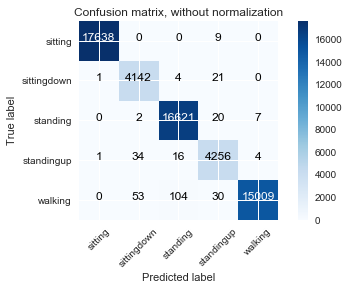

Precision: 0.990452733623
Recall: 0.993289264396
F1 Score: 0.991849893856


In [21]:
# Definindo os hiperparâmetros do KNeighborsClassifier
parameters = {'n_neighbors':[5, 6, 7, 8, 9], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
model_knn = refine_model(KNeighborsClassifier(), parameters, X_train_scaled, y_train, X_test_scaled, y_test)

Confusion matrix, without normalization
[[17635     0     0    12     0]
 [    1  4129     6    24     8]
 [    0     1 16598    16    35]
 [    1    29    16  4251    14]
 [    0    12    13     9 15162]]


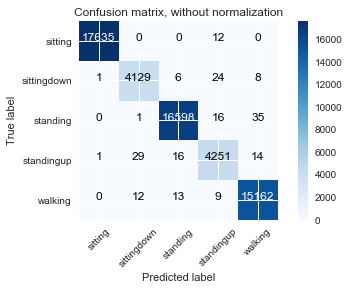

Precision: 0.993964187536
Recall: 0.994136910694
F1 Score: 0.994050338703


In [22]:
# Definindo os parâmetros do RandomForestClassifier
parameters = {"n_estimators" : [10,250]
            ,"min_samples_split" :[2,4,6]
            ,"min_samples_leaf": [3,5]
            ,"criterion": ('gini','entropy')}
model_rf = refine_model(RandomForestClassifier(), parameters, X_train_scaled, y_train, X_test_scaled, y_test)

O algoritmo [sklearn.naive_bayes.GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) não possui parâmetros para ser refinado com o GridSearchCV. Porém vamos criar o modelo para ser utilizado na próxima sessão.

In [23]:
# O GaussianNB não possui parâmetros
model_gnb = GaussianNB()
model_gnb.fit(X_train_scaled, y_train.values.ravel())
pred = model_gnb.predict(X_test_scaled)
print("Precision:",precision_score(y_test, pred, average="macro"))
print("Recall:", recall_score(y_test, pred, average="macro"))
print("F1 Score:", f1_score(y_test, pred, average="macro"))

Precision: 0.64857742028
Recall: 0.654520866761
F1 Score: 0.634017619276


### Resultados após o refinamento

Após o refinamento os modelos feitos com o KNN e o Random Forest tiveram ganhos de performance, superando 0.99 para o F1. Segue a tabela abaixo:

|              | Precision | Recall | F1     |
|--------------|-----------|--------|--------|
| KNN          |    0.9904 | 0.9932 | 0.9918 |
| RandomForest |    0.9939 | 0.9941 | 0.9940 |
| GaussianNB   |    0.6485 | 0.6545 | 0.6340 |


Até aqui, o Random Forest parece ser o melhor algoritmo dentre os três analisados para o cenário apresentado.

## Scores por classe

Nesta sessão iremos rodar o modelo por classe do dataset. 

Nesta fase final, comparando os _scores_ por classe, poderemos fazer o _benchmark_ com o problema original elaborado pela PUC-Rio.

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score

def score_by_class(model, _X_train, _y_train, _X_test, _y_test):
    y_score = model.predict_proba(_X_test)
    y_pred = model.predict(_X_test)
    n_classes = y_train['class'].nunique()
    class_precision = [None]*n_classes
    class_recall = [None]*n_classes
    class_auc = [None]*n_classes
    class_f1 = [None]*n_classes
       
    class_precision, class_recall, class_f1, _ = precision_recall_fscore_support(_y_test, y_pred, 
                                                                                              beta=1.0, average=None)
    class_auc = multiclass_roc_auc_score(_y_test, y_pred, average=None)
    #print('%.3f' % class_precision[i])

    x=0
    print("           | sitting | sittingdown | standing | standingup | walking |")
    print("----------------------------------------------------------------------")
    print('Precision  |   %.3f |       %.3f |    %.3f |      %.3f |   %.3f |'% 
          (class_precision[0], class_precision[1],class_precision[2], class_precision[3],class_precision[4]))
    print('Recall     |   %.3f |       %.3f |    %.3f |      %.3f |   %.3f |'% 
          (class_recall[0], class_recall[1],class_recall[2], class_precision[3],class_recall[4]))
    print('F1         |   %.3f |       %.3f |    %.3f |      %.3f |   %.3f |'% 
          (class_f1[0], class_f1[1],class_f1[2], class_f1[3],class_f1[4]))
    print('ROC AUC    |   %.3f |       %.3f |    %.3f |      %.3f |   %.3f |'% 
          (class_auc[0], class_auc[1],class_auc[2], class_auc[3],class_auc[4]))


In [25]:
score_by_class(model_knn, X_train_scaled, y_train, X_test_scaled, y_test)

           | sitting | sittingdown | standing | standingup | walking |
----------------------------------------------------------------------
Precision  |   1.000 |       0.979 |    0.993 |      0.982 |   0.999 |
Recall     |   0.999 |       0.994 |    0.998 |      0.982 |   0.988 |
F1         |   1.000 |       0.986 |    0.995 |      0.984 |   0.993 |
ROC AUC    |   1.000 |       0.996 |    0.998 |      0.993 |   0.994 |


In [26]:
score_by_class(model_rf, X_train_scaled, y_train, X_test_scaled, y_test)

           | sitting | sittingdown | standing | standingup | walking |
----------------------------------------------------------------------
Precision  |   1.000 |       0.990 |    0.998 |      0.986 |   0.996 |
Recall     |   0.999 |       0.991 |    0.997 |      0.986 |   0.998 |
F1         |   1.000 |       0.990 |    0.997 |      0.986 |   0.997 |
ROC AUC    |   1.000 |       0.995 |    0.998 |      0.992 |   0.998 |


In [27]:
score_by_class(model_gnb, X_train_scaled, y_train, X_test_scaled, y_test)

           | sitting | sittingdown | standing | standingup | walking |
----------------------------------------------------------------------
Precision  |   0.958 |       0.435 |    0.699 |      0.279 |   0.872 |
Recall     |   0.865 |       0.702 |    0.921 |      0.279 |   0.639 |
F1         |   0.909 |       0.537 |    0.795 |      0.192 |   0.738 |
ROC AUC    |   0.924 |       0.816 |    0.881 |      0.558 |   0.803 |


## Referências

Ugulino, W.; Cardador, D.; Vega, K.; Velloso, E.; Milidiu, R.; Fuks, H. Wearable Computing: Accelerometers' Data Classification of Body Postures and Movements. Proceedings of 21st Brazilian Symposium on Artificial Intelligence. Advances in Artificial Intelligence - SBIA 2012. In: Lecture Notes in Computer Science. , pp. 52-61. Curitiba, PR: Springer Berlin / Heidelberg, 2012. ISBN 978-3-642-34458-9. DOI: 10.1007/978-3-642-34459-6_6. 

Read more: [http://groupware.les.inf.puc-rio.br/har#ixzz577kG5mmP](http://groupware.les.inf.puc-rio.br/har#ixzz577kG5mmP)


[Receiver Operating Characteristic (ROC)](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)

[Confusion matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

[Feature importances with forests of trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

